# Black-Scholes Model

Calculates the price of a vanilla European call or put option
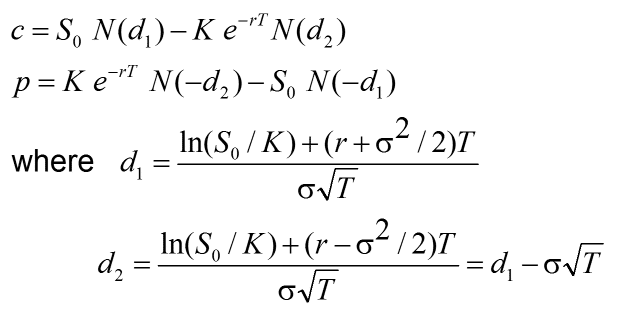

In [1]:
import numpy as np
import math

In [2]:
def phi(x):
    return (1 + math.erf(x / np.sqrt(2))) / 2

def black_scholes(S, K, T, r, sigma, option = 'call'):
    
    #S: spot(current) price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility
    
    d1 = (np.log(S/K) + T * (r + 0.5 * sigma ** 2)) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option == 'call':
        price = S * phi(d1) - K * np.exp(-r * T) * phi(d2)
    if option == 'put':
        price = K * np.exp(-r * T) * phi(-d2) - S * phi(-d1)
        
    return price

In [3]:
black_scholes(10,20,1,0.05,0.10)

1.2948314587993106e-11

In [4]:
black_scholes(10,20,1,0.05,0.10,'put')

9.024588490027227

# Black-Scholes with dividend yield

Calculates the price of a vanilla European call or put option with dividend yield
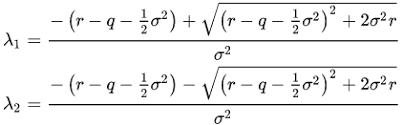

In [5]:
def black_scholes_with_dividends(S, K, T, r, sigma, q, option = 'call'):
    
    #S: spot(current) price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility
    #q: dividend rate of asset(assumed to be paid at a constant rate)
    
    d1 = (np.log(S/K) + T * (r - q + 0.5 * sigma ** 2)) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option == 'call':
        price = S * phi(d1) * np.exp(-q * T) - K * np.exp(-r * T) * phi(d2)
    if option == 'put':
        price = K * np.exp(-r * T) * phi(-d2) - S * np.exp(-q * T) * phi(-d1)
        
    return price